# Cheat Sheet - CENTRAL LIMIT THEOREM
### By François GOUJON


Content : Experimental proof of the Central Limit Theorem.

In [2]:
# Imports
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

## Functions

In [3]:
def pileface(n):
    """Draw n samples of a head/tails game : mu = 0, sigma = 1
    """
    return np.random.choice([-1, 1], n)

def de6face(n):
    """Draw n samples of a 6 faced dice : mu = 3.5, sigma^2 = 2,92
    """
    return np.random.randint(1, 7, n)

def simulations(func, n, nbsimu):
    """
    CLT : Xi random variable with mean mu and variance var 
    then X1 + X2 + ... + Xn follows N(n*mu, n*var) if n >> 50
    Makes nbsimu simulations where each simulation is the sum of n random variables
    and plots the obtained distribution
    """
    sums = defaultdict(int)
    for k in range(nbsimu):
        sums[np.sum(func(n))] += 1
    x, y = list(zip(*sums.items()))
    plt.scatter(x,y)
    #mean : should be n*mean
    mean = 0
    for i in range(len(x)):
        mean += x[i] * y[i]
    mean = mean/nbsimu
    print("Mean : " + str(mean))
    #var : should be n*var
    var = 0
    for i in range(len(x)):
        var += (x[i]-mean)**2 * y[i]
    var = var/nbsimu
    print("Var : " + str(var))
    return x,y 

## Results

Mean : 0.0922
Var : 101.15429916000001


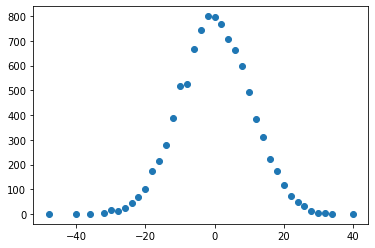

In [4]:
x, y = simulations(pileface, 100, 10000)

Mean : 349.7579
Var : 285.43168758999997


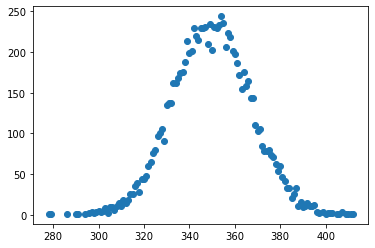

In [5]:
x1, y1 = simulations(de6face, 100, 10000)